<a href="https://colab.research.google.com/github/EDSONRRs/DIPLOMADO/blob/main/Exposici%C3%B3n_Diplomado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly as pip

In [ ]:
Act =pd.read_csv('/content/credits.csv')
Act

In [ ]:
peli=pd.read_csv('/content/titles.csv')
peli.head()

In [ ]:
Reper=peli.merge(Act,on='id',how='left')#juntar ambas bases de datos por medio de la id
len(Reper)#Total de filas obtenidas

66567

<Axes: xlabel='Cantidad', ylabel='Tipo de produccion'>

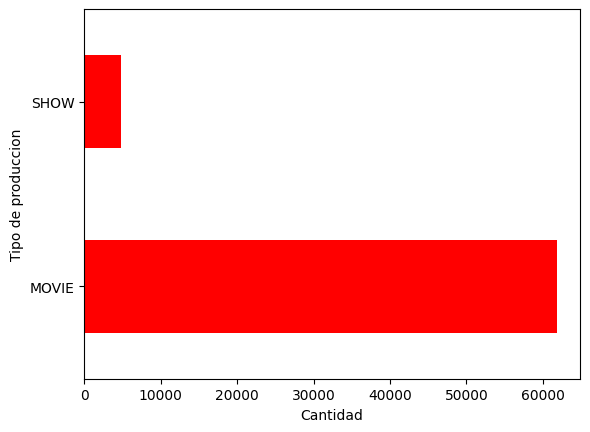

In [ ]:
Reper['type'].value_counts().plot(kind='barh',color='red',xlabel='Cantidad',ylabel='Tipo de produccion')#Grafica la repeticioon de valores unicos de type

<Axes: >

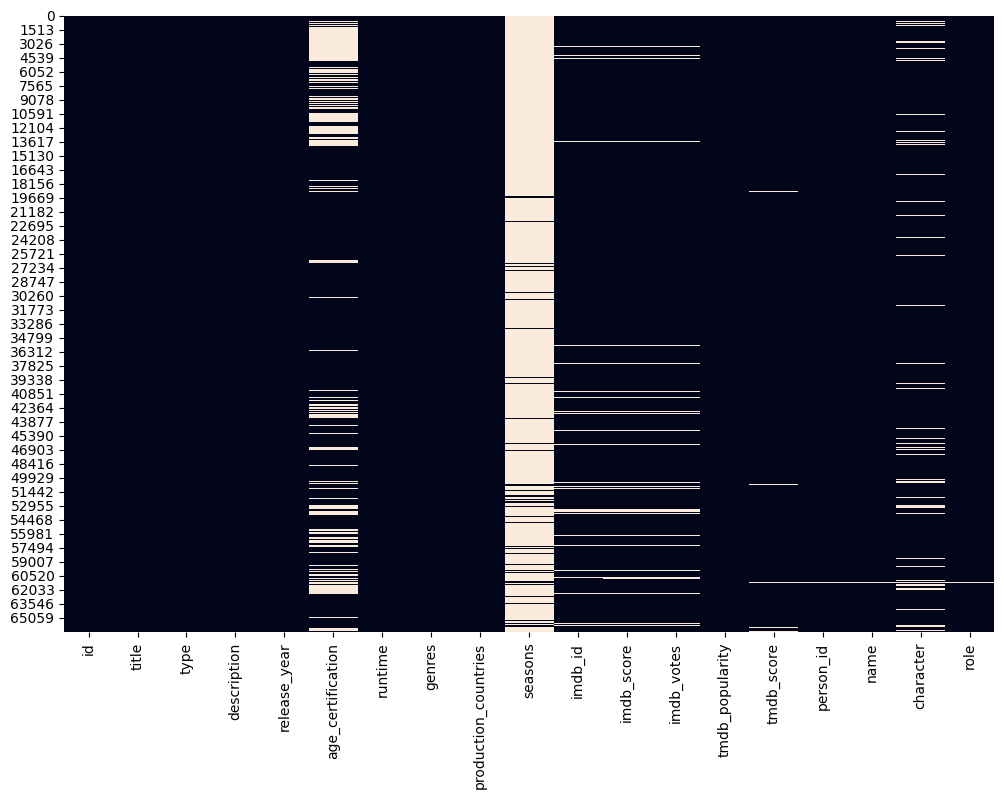

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(Reper.isnull(),cbar=False)

In [ ]:
print('Cantidad de ciudades que producen las series y peliculas:',Reper['production_countries'].unique().shape)

Cantidad de ciudades que producen las series y peliculas: (268,)


In [ ]:
Reper ['production_countries']=Reper['production_countries'].str.strip('[]')
#A dataFRame le quitamos los corchetes que contienen los nombres de los paises

In [ ]:
Reper['production_countries']=Reper['production_countries'].replace(r'^s*$', float('NaN'), regex = True)
Reper.dropna(subset=['production_countries'],inplace=True)#line 17 y 18: Reemplazar y quitar los valores nulos

<Axes: ylabel='Paises'>

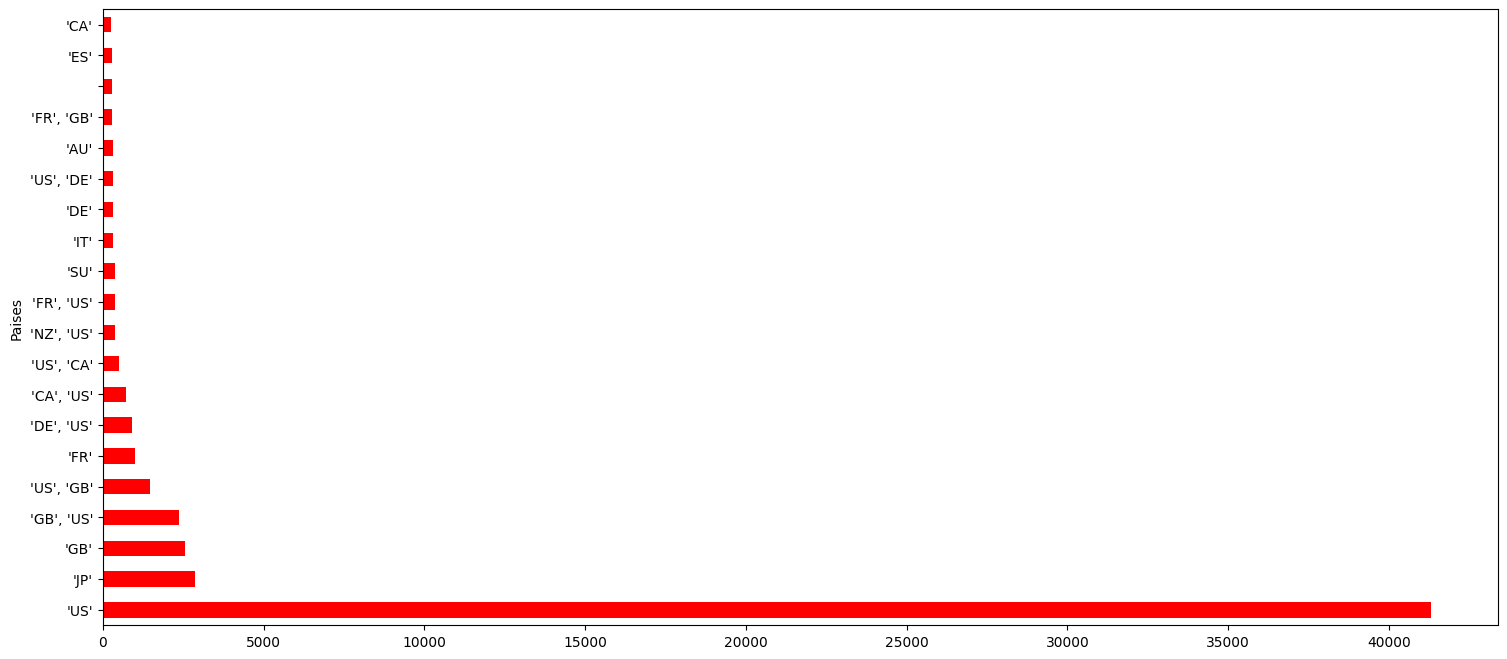

In [ ]:
plt.subplots(figsize=(18,8))
plt.xlabel('Total Producciones')
plt.ylabel('Paises')

Reper['production_countries'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh',color='red')

In [ ]:
type_data=Reper.groupby('type')['release_year'].value_counts().sort_values().unstack().fillna(0).T.reset_index()
type_data.rename(columns={'type':'index','release_year':'Año','MOVIE':'Pelicula','SHOW':'Serie'},inplace=True)
#Filtramos los datos de tipo de produccion por año, ordenando y rellenando con 0 las que no contengan datos para despue
#hacer una indexacion a la DtaFrame, tambien re nombramos las columnas

In [ ]:
type_data.rename(index={'type':'index'},inplace=True)#Renombramos


In [ ]:
fig=px.scatter(type_data,x='Año',y=['Pelicula','Serie'],width=700,height=600)
fig.show()#Graficamos en base al año y el tipo de produccion

<Axes: ylabel='Clasificación de Edad'>

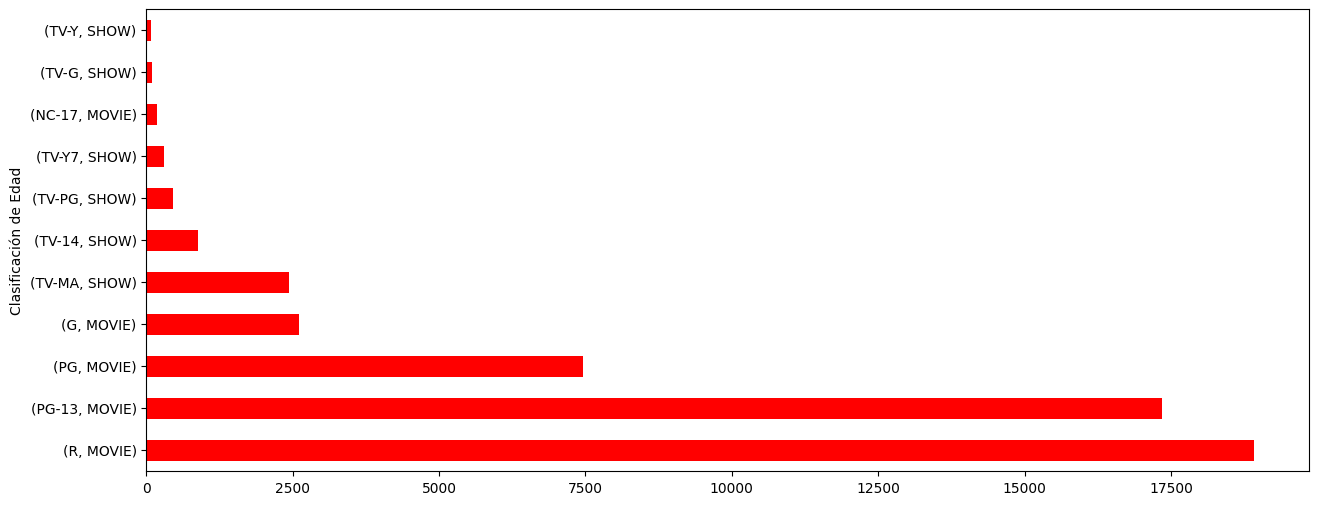

In [ ]:
plt.subplots(figsize=(15,6))
plt.xlabel('counts')
Reper.groupby('age_certification')['type'].value_counts().sort_values(ascending=False).plot(kind='barh',color='red',ylabel='Clasificación de Edad') #Representa la cuenta de ocurrencia de cada elemento del eje y

In [ ]:
MOVIE=Reper[['imdb_votes','type','title']].sort_values('imdb_votes',ascending=False).drop_duplicates().reset_index(drop=True)[:5]
MOVIE

,imdb_votes,type,title
0,2555504.0,MOVIE,The Dark Knight
1,2548100.0,MOVIE,The Shawshank Redemption
2,2268288.0,MOVIE,Inception
3,1983794.0,SHOW,Game of Thrones
4,1857949.0,MOVIE,The Matrix


In [ ]:
MOVIE2=Reper[['imdb_votes','type','title']].sort_values('imdb_votes',ascending=True).drop_duplicates().reset_index(drop=True)[:5]
MOVIE2

,imdb_votes,type,title
0,5.0,MOVIE,Love and Baseball
1,5.0,SHOW,Divorce
2,5.0,MOVIE,Polar Bears
3,6.0,MOVIE,The Making Of David Attenborough's Light On Earth
4,6.0,MOVIE,Habla y Habla


In [ ]:
MOVIE=MOVIE[MOVIE['type'] != 'SHOW']
MOVIE#Series con mayor numero de votos

In [ ]:
print('La mejor pelicula es:',MOVIE.imdb_votes.max(),'La peor pelicula es :',MOVIE.imdb_votes.min())


La mejor pelicula es: 2555504.0 La peor pelicula es : 989119.0


In [ ]:
tv=Reper[Reper['type']=='SHOW']#mejores series
tv[['imdb_votes','type', 'title']].sort_values('imdb_votes',ascending=False).drop_duplicates().reset_index(drop=True)[:5]

,imdb_votes,type,title
0,1983794.0,SHOW,Game of Thrones
1,950362.0,SHOW,Friends
2,782154.0,SHOW,The Big Bang Theory
3,693955.0,SHOW,Chernobyl
4,546443.0,SHOW,True Detective


In [ ]:
#peores series
tv=Reper[Reper['type']=='SHOW']
tv[['imdb_votes','type', 'title']].sort_values('imdb_votes',ascending=True).drop_duplicates().reset_index(drop=True)[:5]

,imdb_votes,type,title
0,5.0,SHOW,Divorce
1,6.0,SHOW,HBO Latino Presents: A Tiny Audience
2,7.0,SHOW,Heroes Cotidianos
3,7.0,SHOW,ER
4,7.0,SHOW,Halfworlds


In [ ]:
Reper[['imdb_score','title','type']].sort_values('imdb_score',ascending=False).drop_duplicates().reset_index(drop=True)[:5]#LAs 5 mejores de todo

,imdb_score,title,type
0,9.4,Chernobyl,SHOW
1,9.4,Band of Brothers,SHOW
2,9.3,The Shawshank Redemption,MOVIE
3,9.3,The Wire,SHOW
4,9.3,Lamput,SHOW


In [ ]:
Reper[['tmdb_popularity','title','type','tmdb_score']].sort_values(by='tmdb_popularity',ascending=False).drop_duplicates().reset_index(drop=True)[:5]#Las 5 mas populares

,tmdb_popularity,title,type,tmdb_score
0,4447.894,The Batman,MOVIE,7.8
1,757.816,The Baby,SHOW,8.8
2,641.541,The Matrix Resurrections,MOVIE,6.7
3,565.886,Kimi,MOVIE,6.2
4,559.090,The King's Man,MOVIE,6.9


In [ ]:
tv['seasons']=tv['seasons'].dropna().astype(int)

<ipython-input-57-09b34e8a2b59>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tv[['seasons','title']].sort_values('seasons',ascending=False).drop_duplicates().dropna().reset_index(drop=True)[:20]#EL que tiene el mayor numero de temporadas

,seasons,title
0,52,Sesame Street
1,31,Top Gear
2,28,Real Sports with Bryant Gumbel
3,26,The Bachelor
4,25,South Park
5,20,Real Time with Bill Maher
6,18,The Bachelorette
7,17,Hard Knocks
8,16,Tom and Jerry
9,15,ER
